In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


In [27]:
# Define file path  
adult_file_path = (r"C:\Users\Work\OneDrive - *****\a*****1.csv")

In [28]:
# Read the .data file into a pd df
data = pd.read_csv(adult_file_path)

# Show rows of the df
print(data.head(20))

    age          workclass  fnlwgt      education  education-num  \
0    39          State-gov   77516      Bachelors             13   
1    50   Self-emp-not-inc   83311      Bachelors             13   
2    38            Private  215646        HS-grad              9   
3    53            Private  234721           11th              7   
4    28            Private  338409      Bachelors             13   
5    37            Private  284582        Masters             14   
6    49            Private  160187            9th              5   
7    52   Self-emp-not-inc  209642        HS-grad              9   
8    31            Private   45781        Masters             14   
9    42            Private  159449      Bachelors             13   
10   37            Private  280464   Some-college             10   
11   30          State-gov  141297      Bachelors             13   
12   23            Private  122272      Bachelors             13   
13   32            Private  205019     Assoc-acd

In [29]:
#  Distribution of the target variable
target_distribution = data['income'].value_counts(normalize=True)

#   Statistical summary of numerical attributes
numerical_summary = data.describe()

#   Explore the distribution of categorical attributes
categorical_attributes = data.select_dtypes(include=['object']).nunique()

target_distribution, numerical_summary, categorical_attributes

(income
  <=50K    0.75919
  >50K     0.24081
 Name: proportion, dtype: float64,
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
 count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
 mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
 std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
 min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
 25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
 50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
 75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
 max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   
 
        hours-per-week  
 count    32561.000000  
 mean        40.437456  
 std         12.347429  
 min          1.000000  
 25%         40.000000  
 50%         40.000000  
 75%         

In [30]:
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

adult_df = pd.read_csv(r"C:\Users\Work\OneDrive - University of Salford\adult.data", header=None, names=column_names, na_values=' ?')

# Check agin for missing values  
missing_values = adult_df.isnull().sum()

# Check the % of missing values for each column
missing_percentage = (missing_values / len(adult_df)) * 100
 
missing_adult_df = pd.DataFrame({'Number of Missing Values': missing_values, 'Percentage': missing_percentage})
missing_adult_df.sort_values(by='Percentage', ascending=False)

,Number of Missing Values,Percentage
occupation,1843,5.660146
workclass,1836,5.638647
native-country,583,1.790486
age,0,0.000000
fnlwgt,0,0.000000
education,0,0.000000
education-num,0,0.000000
marital-status,0,0.000000
relationship,0,0.000000
race,0,0.000000


In [33]:
from sklearn.impute import SimpleImputer, KNNImputer

# For 'workclass' and 'occupation', use mode imputation
mode_imputer = SimpleImputer(strategy='most_frequent')

# For 'native-country',set KNNImputer 
knn_imputer = KNNImputer(n_neighbors=5)

adult_df['workclass'] = mode_imputer.fit_transform(adult_df[['workclass']]).ravel()
adult_df['occupation'] = mode_imputer.fit_transform(adult_df[['occupation']]).ravel()


adult_df_encoded = pd.get_dummies(adult_df, drop_first=True)

# Apply KNN imputer on the encoded DataFrame
adult_df_imputed = pd.DataFrame(knn_imputer.fit_transform(adult_df_encoded), columns=adult_df_encoded.columns)

# The imputed values for 'native-country'  one-hot encoded format
native_country_cols = [col for col in adult_df_imputed.columns if 'native-country' in col]

imputed_countries = adult_df_imputed[native_country_cols].idxmax(axis=1)
imputed_countries = imputed_countries.apply(lambda x: x.replace('native-country_', ''))

adult_df['native-country'] = imputed_countries.values


missing_values_after_imputation = adult_df.isnull().sum()
missing_values_after_imputation


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


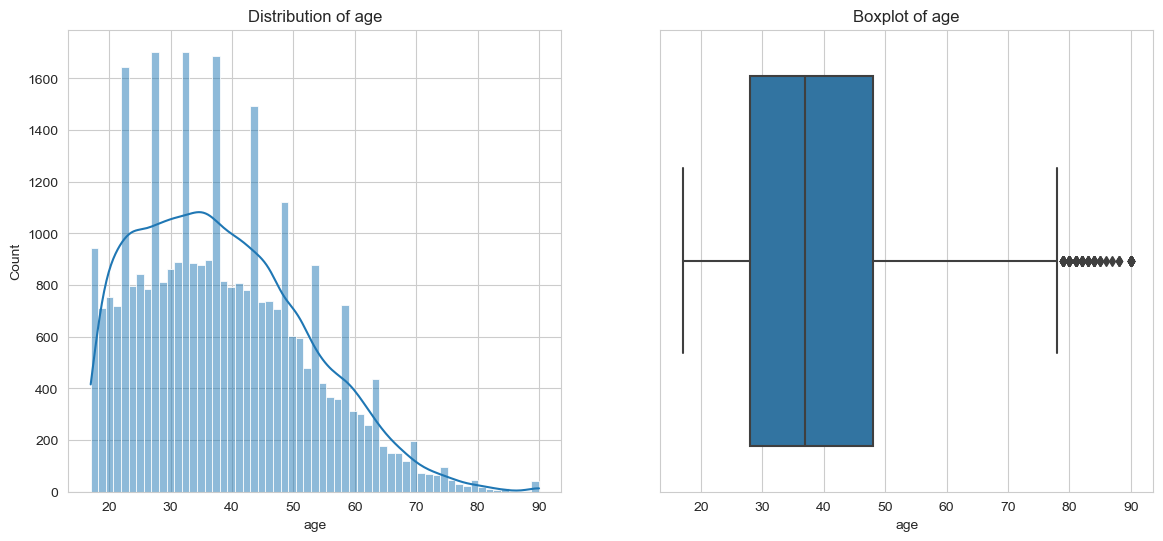

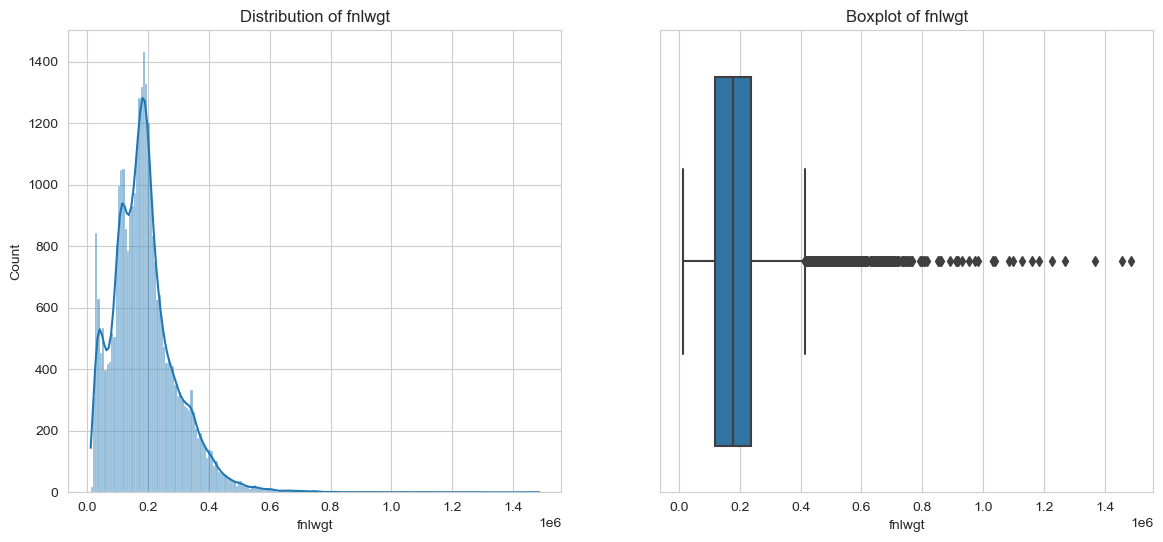

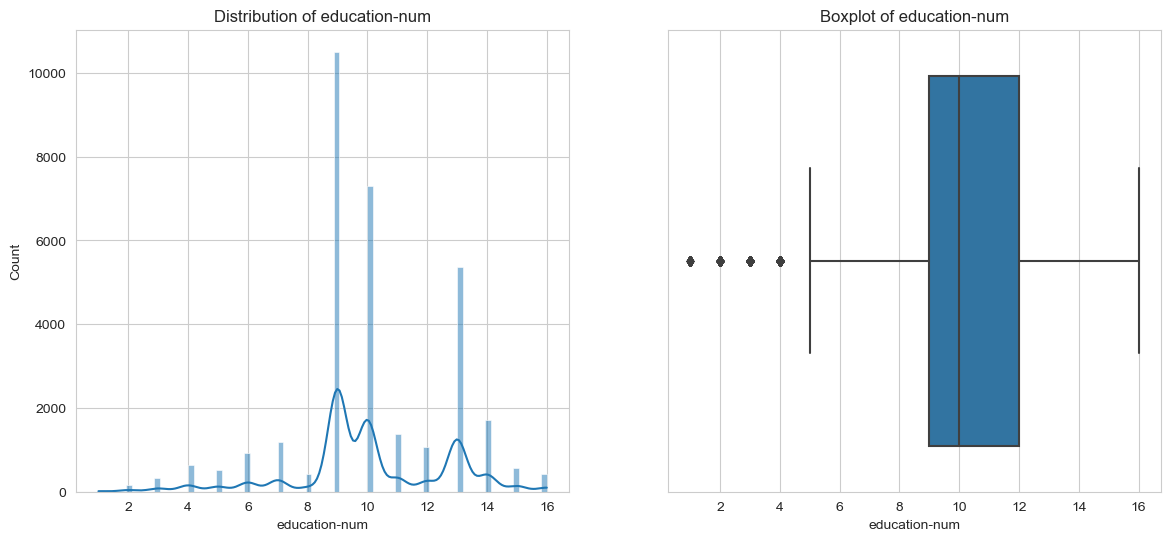

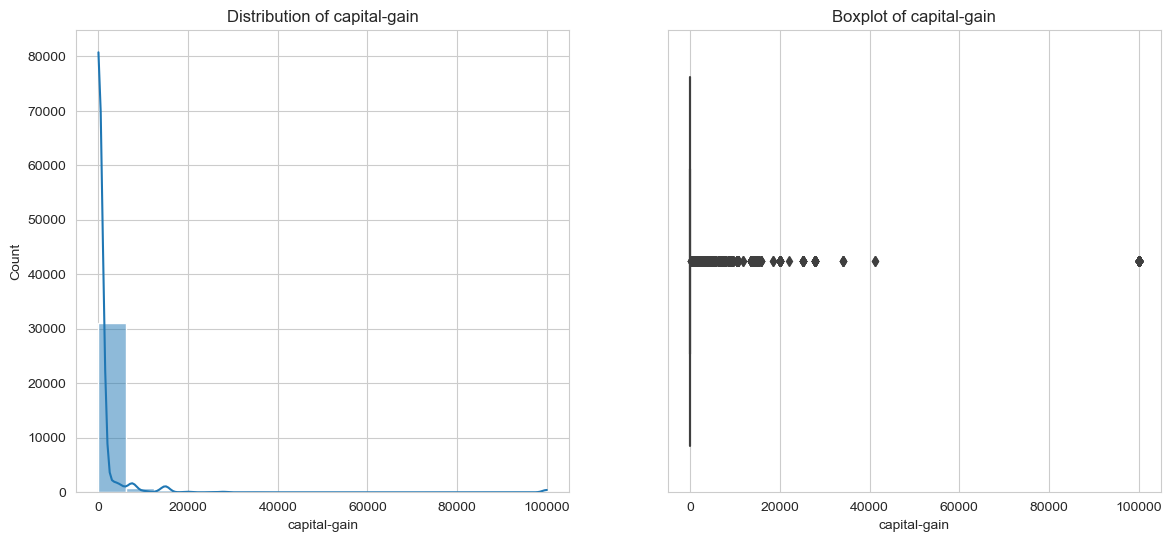

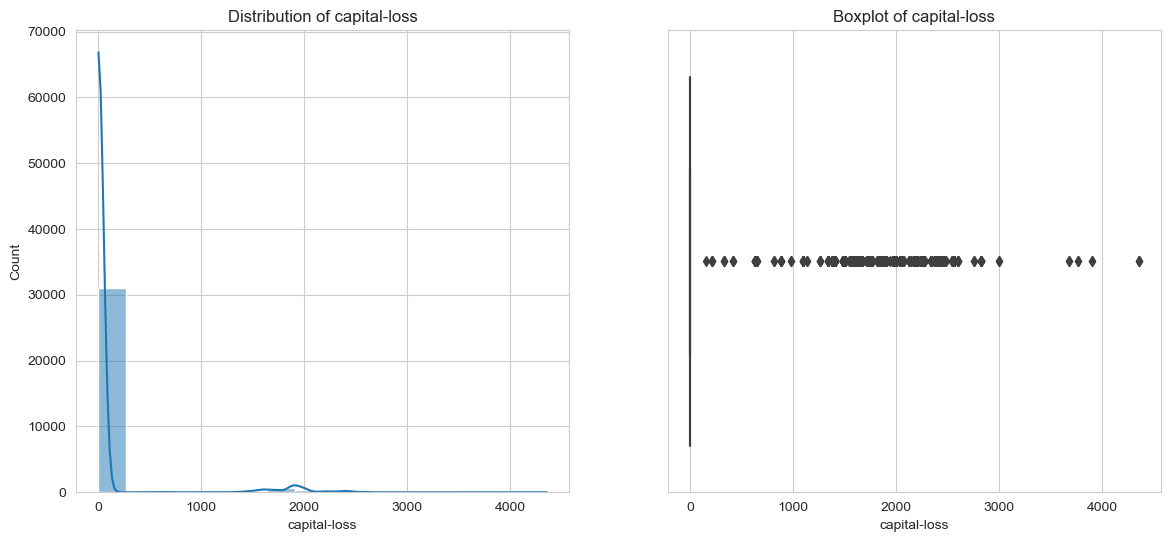

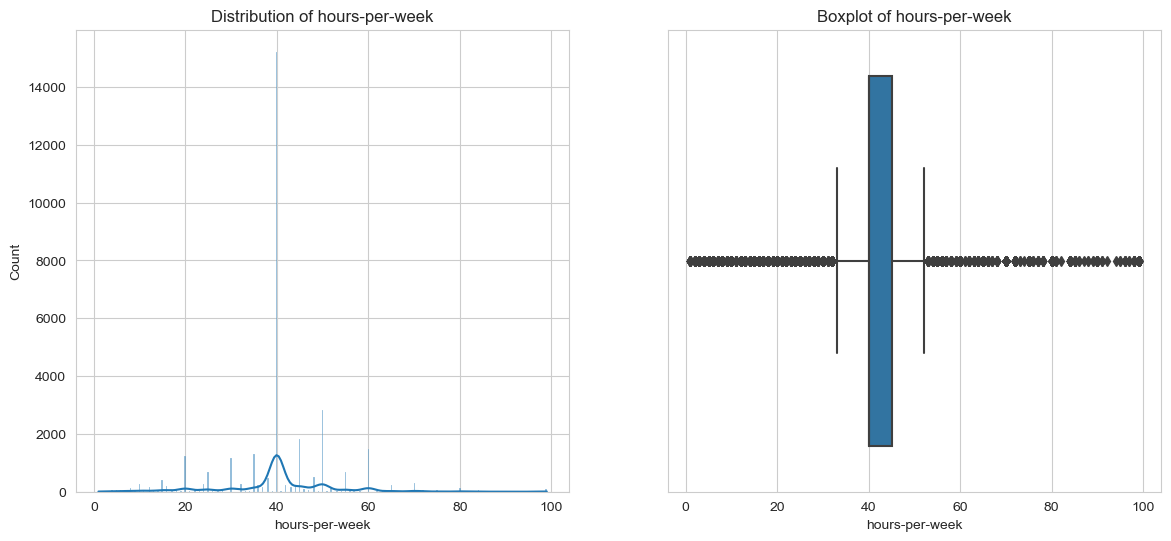

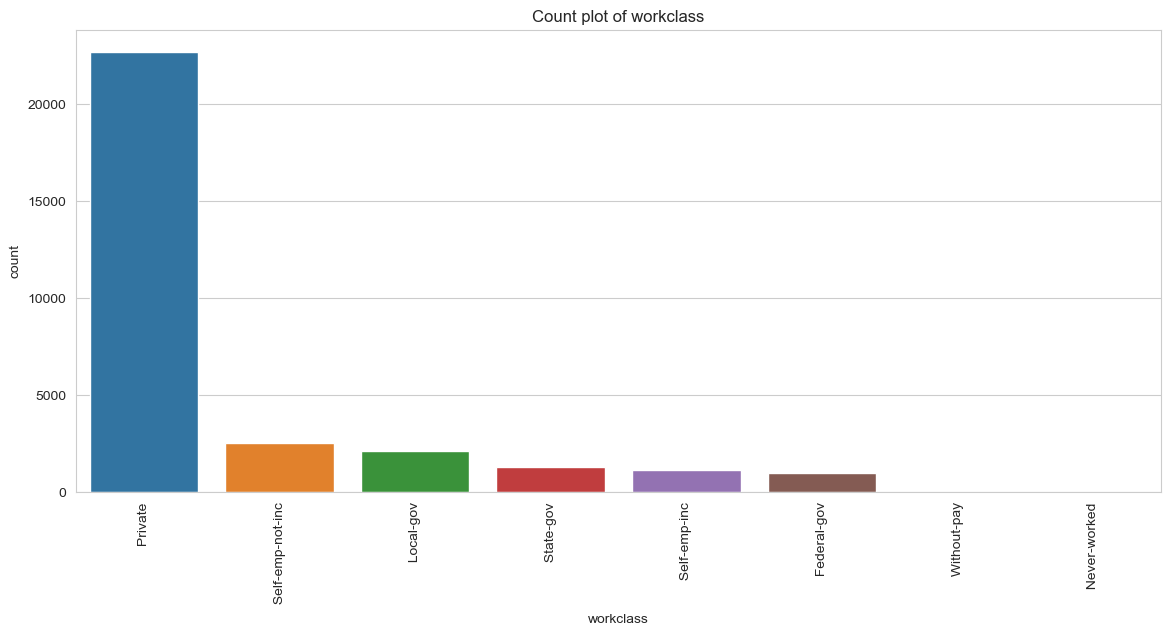

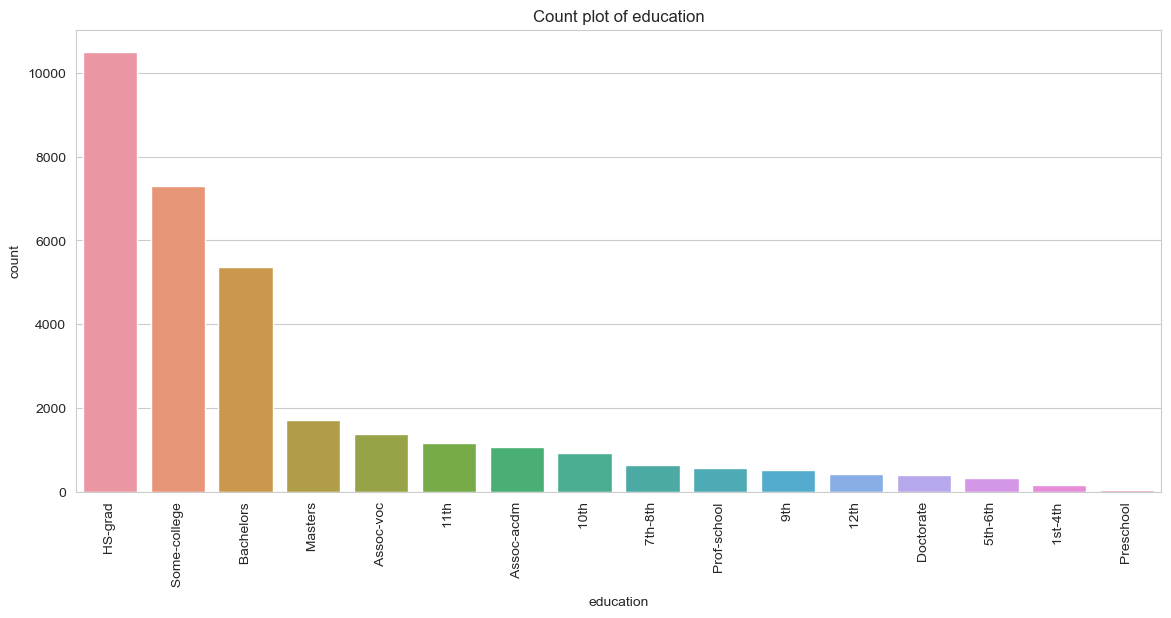

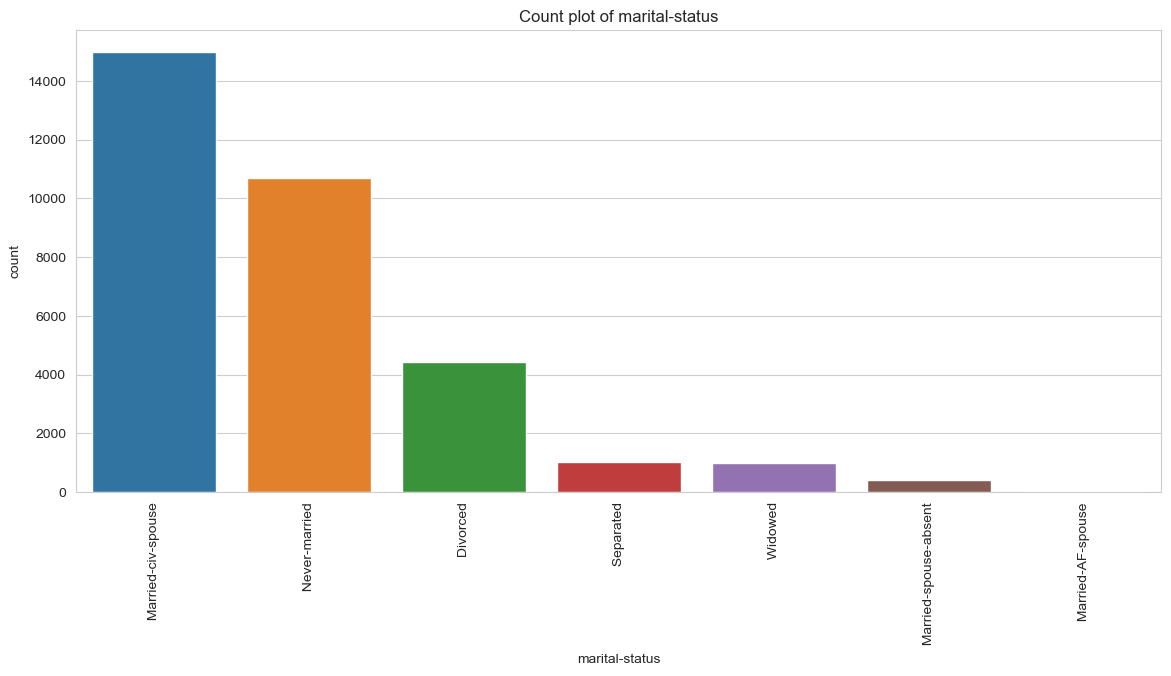

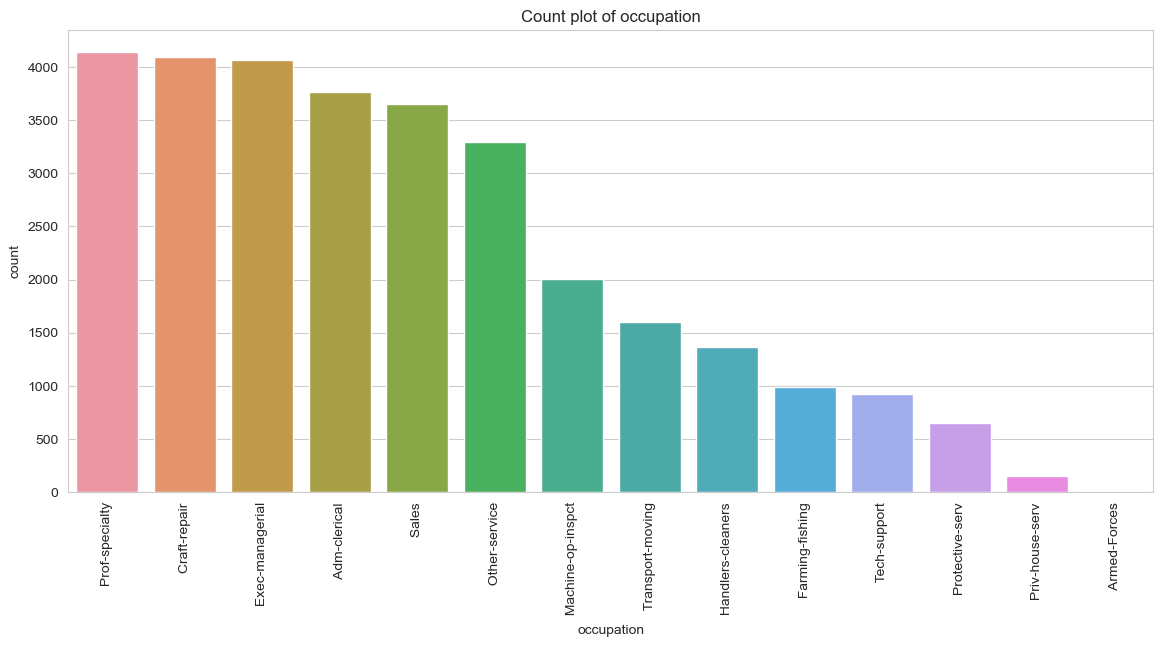

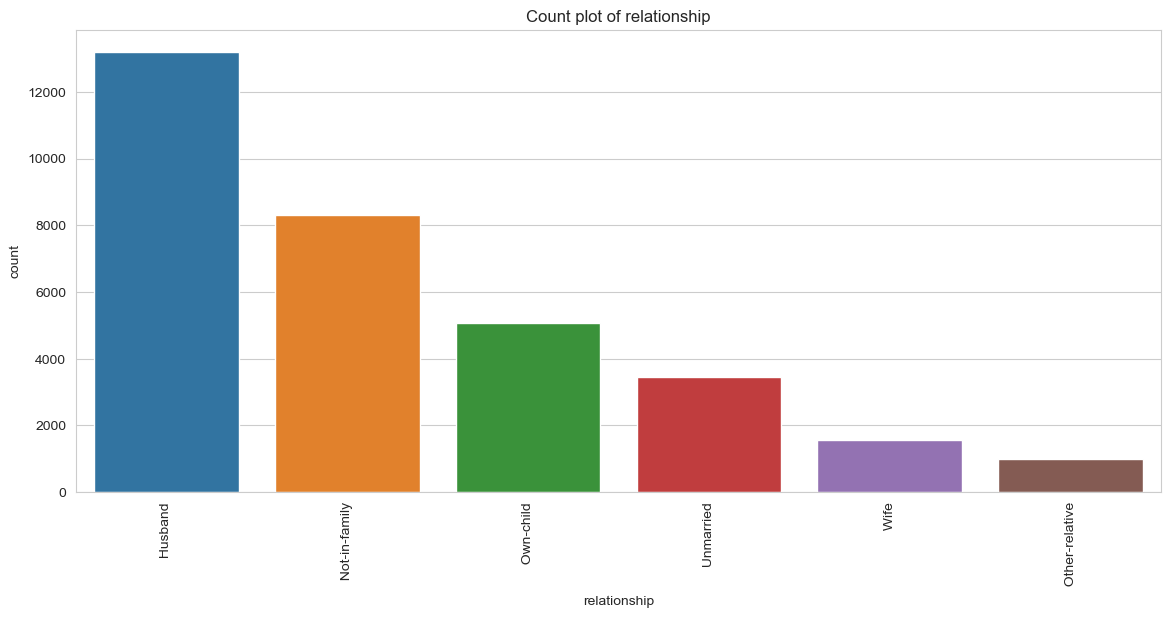

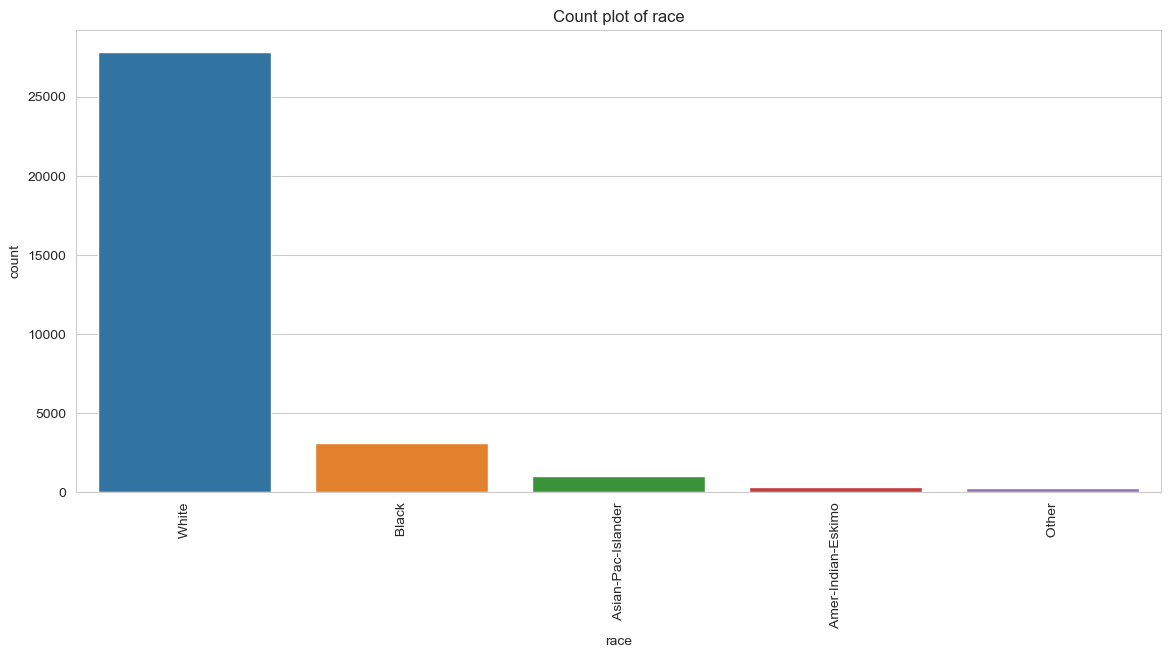

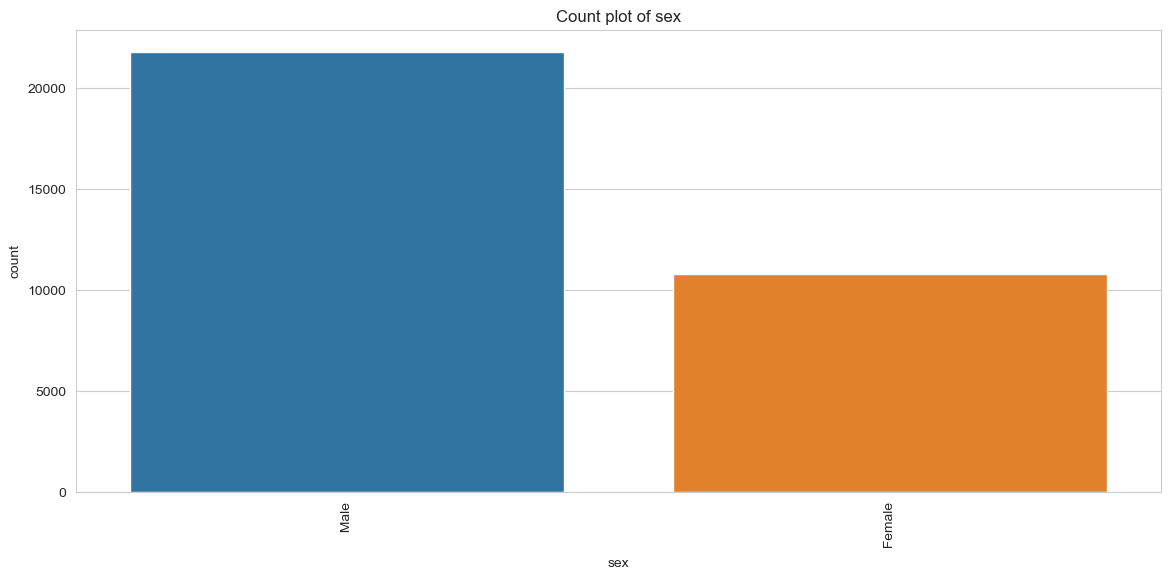

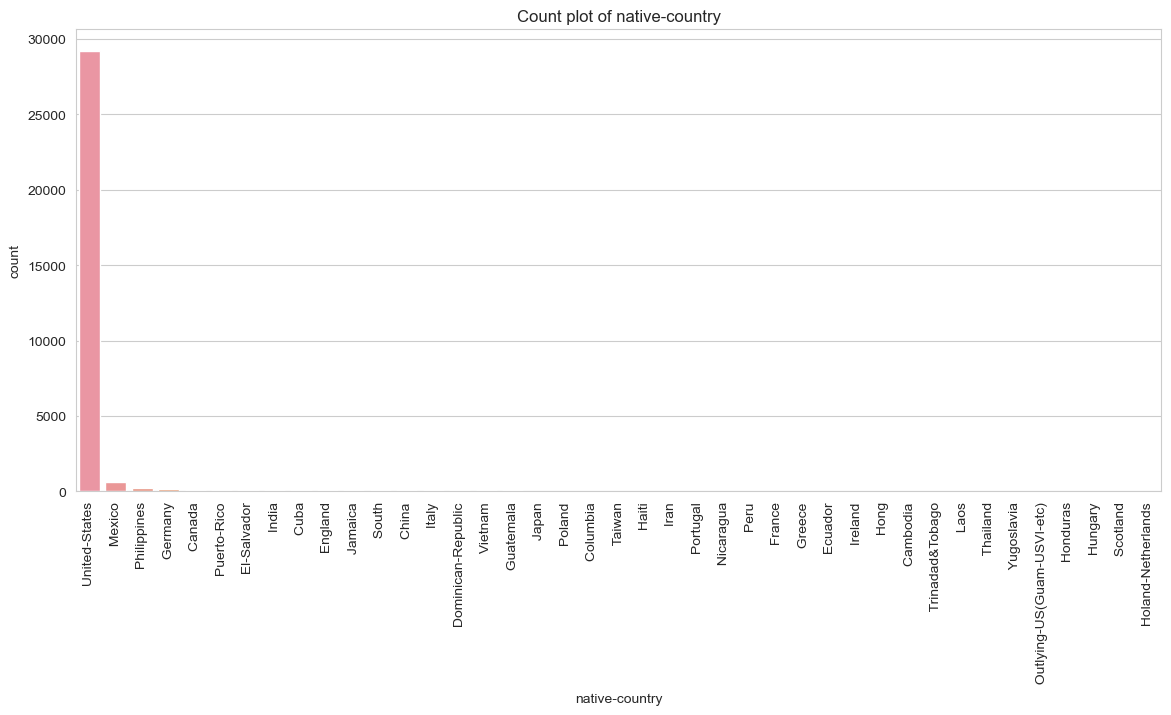

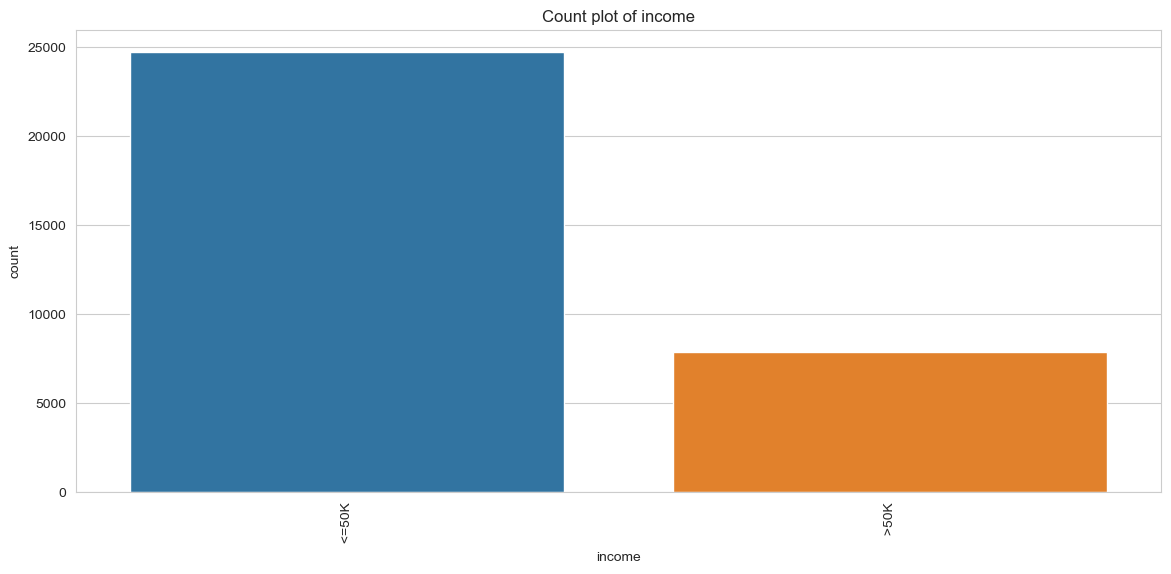

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# style of the plots
sns.set_style('whitegrid')

def eda_plots(dataframe):
    """
    Generates EDA plots for numerical and categorical data within the given dataframe.
    :param dataframe: pandas DataFrame containing the data to be analyzed.
    """
    numerical_data = dataframe.select_dtypes(include=['int64', 'float64'])
    categorical_data = dataframe.select_dtypes(include=['object', 'bool', 'category'])

    # For numerical data,create histograms and boxplots
    for column in numerical_data:
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
        sns.histplot(numerical_data[column], kde=True, ax=ax[0])
        ax[0].set_title(f'Distribution of {column}')
        sns.boxplot(x=numerical_data[column], ax=ax[1])
        ax[1].set_title(f'Boxplot of {column}')
        plt.show()

    # For categorical data create count plots
    for column in categorical_data:
        plt.figure(figsize=(14, 6))
        sns.countplot(x=categorical_data[column], order = categorical_data[column].value_counts().index)
        plt.title(f'Count plot of {column}')
        plt.xticks(rotation=90)
        plt.show()


eda_plots(adult_df)


In [15]:
from scipy import stats
import numpy as np

# Outlier detection 
def detect_outliers(dataframe, features):
    outlier_indices = []

    for c in features:
        # 1st quartile (25%)
        Q1 = np.percentile(dataframe[c], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(dataframe[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier 
        outlier_step = 1.5 * IQR
        # List of indices of outliers for feature c
        outlier_list_col = dataframe[(dataframe[c] < Q1 - outlier_step) | (dataframe[c] > Q3 + outlier_step)].index
        # Append the found outlier indices  
        outlier_indices.extend(outlier_list_col)
    
    # observations containing more than 2 outliers
    outlier_indices = list(set(outlier_indices))
    return outlier_indices

numerical_cols = adult_df.select_dtypes(include=[np.number]).columns.tolist()
outliers = detect_outliers(adult_df, numerical_cols)


outliers_summary = {'Total Outliers': len(outliers), 'Outlier Indices': outliers[:10]} 
outliers_summary

{'Total Outliers': 13564,
 'Outlier Indices': [0, 1, 6, 8, 9, 10, 12, 15, 20, 21]}

In [16]:
# Outlier management
from scipy.stats.mstats import winsorize
# List of columns to apply Winsorizing
columns_to_winsorize = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


#use the new winsorize colmn. but do not create additional columns
for column in columns_to_winsorize:
    adult_df[column] = winsorize(adult_df[column], limits=[0.05, 0.05])  


print(adult_df.head())


   age          workclass  fnlwgt   education  education-num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loss  hours-per-week  native-country  income  
0          2174             0              40   United-States   <=50

In [17]:
# Correlation analysis for numerical variables
correlation_matrix = adult_df[numerical_cols].corr()


categorical_cols = adult_df.select_dtypes(include=['object']).columns.tolist()
chi_square_values = {}
for col in categorical_cols:
    contingency_table = pd.crosstab(adult_df[col], adult_df['income'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    chi_square_values[col] = {'chi2': chi2, 'p-value': p}

 

correlation_matrix, chi_square_values

(                     age    fnlwgt  education-num  capital-gain  capital-loss  \
 age             1.000000 -0.076739       0.048205      0.125780           NaN   
 fnlwgt         -0.076739  1.000000      -0.038914     -0.003683           NaN   
 education-num   0.048205 -0.038914       1.000000      0.140674           NaN   
 capital-gain    0.125780 -0.003683       0.140674      1.000000           NaN   
 capital-loss         NaN       NaN            NaN           NaN           NaN   
 hours-per-week  0.109769 -0.018750       0.168379      0.104252           NaN   
 
                 hours-per-week  
 age                   0.109769  
 fnlwgt               -0.018750  
 education-num         0.168379  
 capital-gain          0.104252  
 capital-loss               NaN  
 hours-per-week        1.000000  ,
 {'workclass': {'chi2': 827.7183593884149, 'p-value': 1.9338476684848218e-174},
  'education': {'chi2': 4429.653302288619, 'p-value': 0.0},
  'marital-status': {'chi2': 6517.74165366302

In [18]:
# Define target variable and feature set
y = adult_df['income']
adult_df_features = adult_df.drop('income', axis=1)

# Define numerical and categorical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Initialize the ColumnTransformer with OneHotEncoder for categorical features
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), categorical_columns)],
    remainder='passthrough'
)

# Apply the transformations and encode the data
data_encoded_array = column_transformer.fit_transform(adult_df_features).toarray()

feature_names = (column_transformer.named_transformers_['encoder'].get_feature_names_out(categorical_columns)
                 .tolist() + numerical_columns)

data_encoded = pd.DataFrame(data_encoded_array, columns=feature_names, index=adult_df_features.index)

 


In [19]:
# Create the encoded df
data_encoded = pd.DataFrame(
    data_encoded_array,
    columns=column_transformer.get_feature_names_out(),
    index=adult_df_features.index
)

# Add the target variable 'income' back to the encoded DataFrame
data_encoded['income'] = adult_df['income'].apply(lambda x: 1 if x == ' >50K' else 0)


data_encoded.head()

,encoder__workclass_ Federal-gov,encoder__workclass_ Local-gov,encoder__workclass_ Never-worked,encoder__workclass_ Private,encoder__workclass_ Self-emp-inc,encoder__workclass_ Self-emp-not-inc,encoder__workclass_ State-gov,encoder__workclass_ Without-pay,encoder__workclass_nan,encoder__education_ 10th,...,encoder__native-country_ Vietnam,encoder__native-country_ Yugoslavia,encoder__native-country_nan,remainder__age,remainder__fnlwgt,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week,income
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,39.0,77516.0,13.0,2174.0,0.0,40.0,0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,50.0,83311.0,13.0,0.0,0.0,18.0,0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,38.0,215646.0,9.0,0.0,0.0,40.0,0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,53.0,234721.0,7.0,0.0,0.0,40.0,0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,28.0,338409.0,13.0,0.0,0.0,40.0,0


In [20]:
print(data_encoded.columns)


Index(['encoder__workclass_ Federal-gov', 'encoder__workclass_ Local-gov',
       'encoder__workclass_ Never-worked', 'encoder__workclass_ Private',
       'encoder__workclass_ Self-emp-inc',
       'encoder__workclass_ Self-emp-not-inc', 'encoder__workclass_ State-gov',
       'encoder__workclass_ Without-pay', 'encoder__workclass_nan',
       'encoder__education_ 10th',
       ...
       'encoder__native-country_ Vietnam',
       'encoder__native-country_ Yugoslavia', 'encoder__native-country_nan',
       'remainder__age', 'remainder__fnlwgt', 'remainder__education-num',
       'remainder__capital-gain', 'remainder__capital-loss',
       'remainder__hours-per-week', 'income'],
      dtype='object', length=109)


In [21]:
# Separate features and target variable
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

In [22]:
# Split the dataset into training and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Checking the shape of the training and test sets
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((22792, 108), (22792,)), ((9769, 108), (9769,)))

In [35]:
#Numerical Feature Standardization
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined
scaler = StandardScaler()

# Fit the scaler to the training data and then transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)


In [36]:
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (22792, 108)
Training Labels Shape: (22792,)
Test Features Shape: (9769, 108)
Test Labels Shape: (9769,)


In [37]:
print(f"Training Set Class Distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test Set Class Distribution:\n{y_test.value_counts(normalize=True)}")


Training Set Class Distribution:
income
0    0.75917
1    0.24083
Name: proportion, dtype: float64
Test Set Class Distribution:
income
0    0.759238
1    0.240762
Name: proportion, dtype: float64


In [38]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

# Split the dataset into training and test set with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


class_distribution_train = y_train.value_counts(normalize=True)
class_distribution_test = y_test.value_counts(normalize=True)

class_distribution_train, class_distribution_test


(income
 0    0.75917
 1    0.24083
 Name: proportion, dtype: float64,
 income
 0    0.759238
 1    0.240762
 Name: proportion, dtype: float64)

In [49]:
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}")


Training Features Shape: (22792, 104)
Training Labels Shape: (22792,)
Test Features Shape: (9769, 104)
Test Labels Shape: (9769,)


In [50]:
print(f"Training Set Class Distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test Set Class Distribution:\n{y_test.value_counts(normalize=True)}")


Training Set Class Distribution:
0    0.75917
1    0.24083
Name: income, dtype: float64
Test Set Class Distribution:
0    0.759238
1    0.240762
Name: income, dtype: float64


In [52]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf.fit(X_train, y_train)

# Get feature importances from the random forest model
feature_importances = rf.feature_importances_

# view the feature importances
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)


selected_features = sorted_feature_importances[sorted_feature_importances > sorted_feature_importances.mean()].index

#SelectFromModel to select the features in the dataset
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)



C:\Users\conta\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\conta\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [53]:
if list(rf.feature_names_in_) != list(X_train.columns):
    for model_feature, train_feature in zip(rf.feature_names_in_, X_train.columns):
        if model_feature != train_feature:
            print("Mismatch:", model_feature, "<>", train_feature)
else:
    print("Feature names match.")


Feature names match.


# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [55]:
from sklearn.metrics import classification_report, roc_auc_score

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])


In [56]:
print("Random Forest Classification Report:")
print(rf_report)
print("\nRandom Forest ROC-AUC Score:", rf_roc_auc)


Random Forest Classification Report:
{'0': {'precision': 0.8879865944831142, 'recall': 0.92881218821626, 'f1-score': 0.9079406919275125, 'support': 7417}, '1': {'precision': 0.7374440576827449, 'recall': 0.6305272108843537, 'f1-score': 0.6798074719229887, 'support': 2352}, 'accuracy': 0.8569966219674481, 'macro avg': {'precision': 0.8127153260829296, 'recall': 0.7796696995503068, 'f1-score': 0.7938740819252506, 'support': 9769}, 'weighted avg': {'precision': 0.8517417335398786, 'recall': 0.8569966219674481, 'f1-score': 0.8530149745101064, 'support': 9769}}

Random Forest ROC-AUC Score: 0.9065309722378907


In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [58]:
# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Precision
rf_precision = precision_score(y_test, rf_predictions)

# Recall
rf_recall = recall_score(y_test, rf_predictions)

# F1 Score
rf_f1 = f1_score(y_test, rf_predictions)

# Confusion Matrix
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)


In [59]:
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")
print(f"Random Forest Precision: {rf_precision:.2f}")
print(f"Random Forest Recall: {rf_recall:.2f}")
print(f"Random Forest F1 Score: {rf_f1:.2f}")
print(f"Random Forest Confusion Matrix:\n{rf_confusion_matrix}")


Random Forest Accuracy: 0.86
Random Forest Precision: 0.74
Random Forest Recall: 0.63
Random Forest F1 Score: 0.68
Random Forest Confusion Matrix:
[[6889  528]
 [ 869 1483]]


# KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score


knn = KNeighborsClassifier(n_neighbors=5) # You can tune the 'n_neighbors' parameter
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation Metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn, output_dict=True)
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Print the results
print("KNN Accuracy:", accuracy_knn)
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", f1_knn)
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", class_report_knn)
print("KNN ROC-AUC Score:", roc_auc_knn)


KNN Accuracy: 0.7770498515712969
KNN Precision: 0.566923076923077
KNN Recall: 0.3133503401360544
KNN F1 Score: 0.4036144578313253
KNN Confusion Matrix:
 [[6854  563]
 [1615  737]]
KNN Classification Report:
 {'0': {'precision': 0.8093045223757233, 'recall': 0.9240932991775651, 'f1-score': 0.8628981493138613, 'support': 7417}, '1': {'precision': 0.566923076923077, 'recall': 0.3133503401360544, 'f1-score': 0.4036144578313253, 'support': 2352}, 'accuracy': 0.7770498515712969, 'macro avg': {'precision': 0.6881137996494001, 'recall': 0.6187218196568097, 'f1-score': 0.6332563035725933, 'support': 9769}, 'weighted avg': {'precision': 0.7509483795049459, 'recall': 0.7770498515712969, 'f1-score': 0.7523202762084334, 'support': 9769}}
KNN ROC-AUC Score: 0.6705033149163668


# DECISION TREE

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score

# Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation Metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
roc_auc_dt = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

# Print the results
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Precision:", precision_dt)
print("Decision Tree Recall:", recall_dt)
print("Decision Tree F1 Score:", f1_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)
print("Decision Tree ROC-AUC Score:", roc_auc_dt)


Decision Tree Accuracy: 0.8043812058552564
Decision Tree Precision: 0.592375366568915
Decision Tree Recall: 0.6011904761904762
Decision Tree F1 Score: 0.5967503692762186
Decision Tree Confusion Matrix:
 [[6444  973]
 [ 938 1414]]
Decision Tree Classification Report:
 {'0': {'precision': 0.8729341641831482, 'recall': 0.868814884724282, 'f1-score': 0.8708696533549565, 'support': 7417.0}, '1': {'precision': 0.592375366568915, 'recall': 0.6011904761904762, 'f1-score': 0.5967503692762186, 'support': 2352.0}, 'accuracy': 0.8043812058552564, 'macro avg': {'precision': 0.7326547653760316, 'recall': 0.735002680457379, 'f1-score': 0.7338100113155875, 'support': 9769.0}, 'weighted avg': {'precision': 0.8053863811973075, 'recall': 0.8043812058552564, 'f1-score': 0.8048722579047372, 'support': 9769.0}}
Decision Tree ROC-AUC Score: 0.7356607281580558
